In [3]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
np.random.seed(42)
X = np.random.randint(0, 100, size=(100, 1)) 
y = np.random.choice([0, 1], size=100)         

model = LogisticRegression()
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf)

print("Cross-validation scores for each fold:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))


Cross-validation scores for each fold: [0.6 0.5 0.7 0.8 0.8 0.5 0.6 0.7 0.5 0.5]
Mean CV accuracy: 0.6199999999999999


Sample Data:
   Weight  Obese
0      73      1
1      43      1
2      44      1
3      90      1
4      71      1

Cross-validation scores for each fold: [1.  1.  1.  1.  1.  1.  0.9 1.  1.  1. ]
Mean CV accuracy: 0.99


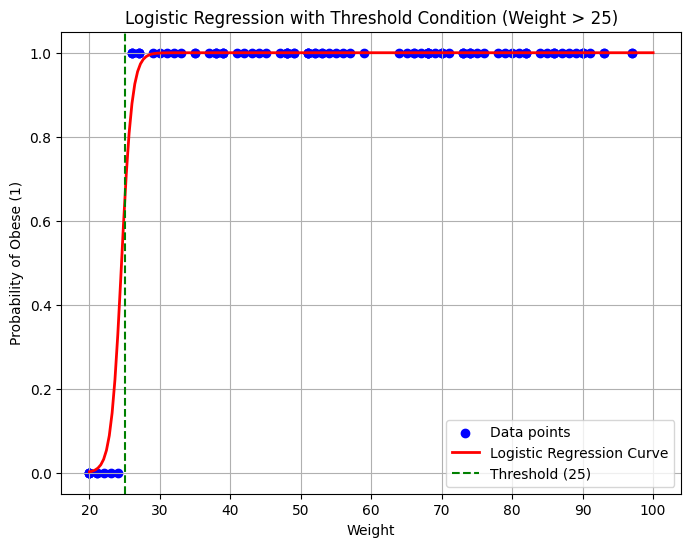

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
import pandas as pd
import matplotlib.pyplot as plt


weight = []
obese = []

for i in range(100):
    a = np.random.randint(20, 100)   # random weight between 20–100
    weight.append(a)
    # Threshold condition (if weight > 25 → obese)
    if a > 25:
        obese.append(1)
    else:
        obese.append(0)


df = pd.DataFrame({"Weight": weight, "Obese": obese})
print("Sample Data:")
print(df.head())


X = np.array(weight).reshape(-1, 1)
y = np.array(obese)

model = LogisticRegression()

# 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf)

print("\nCross-validation scores for each fold:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))


model.fit(X, y)

x_values = np.linspace(20, 100, 200).reshape(-1, 1)
y_prob = model.predict_proba(x_values)[:, 1]

# Plot scatter + logistic regression curve + threshold line
plt.figure(figsize=(8, 6))
plt.scatter(weight, obese, color="blue", label="Data points")
plt.plot(x_values, y_prob, color="red", linewidth=2, label="Logistic Regression Curve")
plt.axvline(x=25, color="green", linestyle="--", label="Threshold (25)")

plt.xlabel("Weight")
plt.ylabel("Probability of Obese (1)")
plt.title("Logistic Regression with Threshold Condition (Weight > 25)")
plt.legend()
plt.grid(True)
plt.show()